# Lab 2 Diverse Dynamics of One-Node Motifs

> Yujia, Ethan, and Vincent adapted from materials developed by Diane and Elizabeth
> 
> 2024/3/28 (Week 2)

Edit this document directly. As you go through the notebooks you will find numbered questions. Please answer in the cells provided. 
   
This is an individual assignment, but you are allowed (encouraged!) to work together in groups and discuss coding and
answers. That said, you are responsible for all the material in this laboratory assignment. **DO NOT
COPY from anyone that you work with.** You are **NOT** allowed to share code. You need to write the code
and answer the questions yourself. Try the coding yourself first before seeking help.

<div class="alert alert-info" role="alert">
    
__Total Points 20__

__Due: 4/4 Thursday 1:30 pm__ -- by the start of your first lab session in week 3.
</div>

If you have any questions, please do not hesitate to ask. You can find the emails and office hours of your instructors and TAs on Canvas. Best of luck!

Feel free to go to the Quantitative Biosciences Center for help! 
[https://college.uchicago.edu/academics/quantitative-biosciences-center](https://college.uchicago.edu/academics/quantitative-biosciences-center)

<div class="alert alert-warning" role="warning">
Total = 20'
    
1.1 a) (2') b) (2') c) (2')

1.2 (1')

1.3 (1')

2.1 (1')

2.2 (2')

2.3 (1')

3.1 (1')

3.2 (1')

3.3 (1')

3.4 (2')

3.5 (1')

3.6 (2')
</div> 


### Copy from your pre-lab code 

You have created the right-hand side (RHS) for the ODE that describes three one-node motifs,
the simply regulated gene, and the negatively and positively autoregulated gene in the prelab.

In this laboratory you will call the 1D-ODEs you created – we
will further explore the dynamics of the three one-node systems.

Run the cell below to import libraries. Copy-and-paste the three RHS functions from your prelab notebook and run them

In [1]:
#Import Libraries Here
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [4]:
# Copy your RHS equations from the prelab here

def srg_rhs(x,t,a,b):
    dxdt = b - a*x
    return(dxdt)

def nrg_rhs(x,t,a,b0,b,k,n):
    dxdt = b0 + b * k**n/(x**n + k**n) - a*x
    return dxdt

def prg_rhs(x,t,a,b0,b,k,n):
    dxdt = b0 + b * x**n/(x**n + k**n) - a*x
    return dxdt

## Part 1 Plot the solutions for a variety of initial conditions and parameters

We will explore the behavior of our simply regulated, negatively, and positively autoregulated gene motifs by altering   
1) initial conditions (will the final steady state value change based on where you start?) and    
2) parameter values (will changing degradation and production rates alter steady state value?).

We will alter the initial conditions and parameter values for each of the 1-node systems.

<h3 style="color:blue;">Tasks for Part 1</h3>

Naturally, the three motifs are parameterized in the same way as described in the prelab.
Please use the parameter values below

__Simply regulated gene__

$$
\begin{align}
\alpha &= 1\qquad\text{Degradation rate in units of 1/time}\\ 
\beta &= 2\qquad\text{Production rate in units of concentration/time}
\end{align}
$$
   
__Positively or negatively autoregulated gene__

$$
\begin{align}
\beta_0 &= 0.2\qquad\text{Basal production rate of X in units of concentration/time}\\   
\beta &= 3.6\qquad\text{Maximum regulated production rate in units of concentration/time}\\
K &= 2\qquad\text{Concentration of X at half-maximum production rate. Similar to }K_M
\text{ in Michaelis-Menten kinetics. In units of concentration}\\
n &= 6\qquad\text{The Hill coefficient, or the cooperativity if one takes a mechanistic view. Unitless}\\
\alpha &= 1\qquad\text{Degradation rate in units of 1/time}
\end{align}
$$


__1.1__ Try different initial conditions or parameters for the three motifs.

You will repeat these "experiments" over the three motifs (the simply regulated gene and the negatively and positively autoregulated gene)
which means that in each section a)-c) you will have three subplots corresponding to the three motifs.

Please include title (e.g. Simply regulated gene), axis labels, and a legend for your figures.

__1.1 a)__ Overlay a series of curves with initial concentration of X spanning from 0 to 6 in steps of 0.3 concentration units. Repeat for the three motifs.

Integrate until $t = 6$ with 100 evenly spaced time points. You don't have to include legend since there are too many curves. 

You can use `plt.subplots` function to create multi-panel figures. Check out the example below

- The syntax is `p, axes = plt.subplot(nrows, ncols)` where `nrows` is the number of subplots in a row and `ncols` is the number of subplots in a column.
- `axes` is a list of handles to the subplot. You can index it like `axes[0]`, `axes[1]`, ... to get a handle for the first panel, the second panel, etc.
- To plot on the ith subplot, you should call `axes[i].plot(something)`. Similarly, you can change the axis limits, labels, title and etc. of each subplot. Though, to change the settings is a bit different now e.g. you should use `axes[i].set_xlabel` instead of `plt.xlabel`.

It'd be great if you get familiar with making subplots though you don't have to right now! If you're more comfortable plotting them separately that's also perfectly fine.

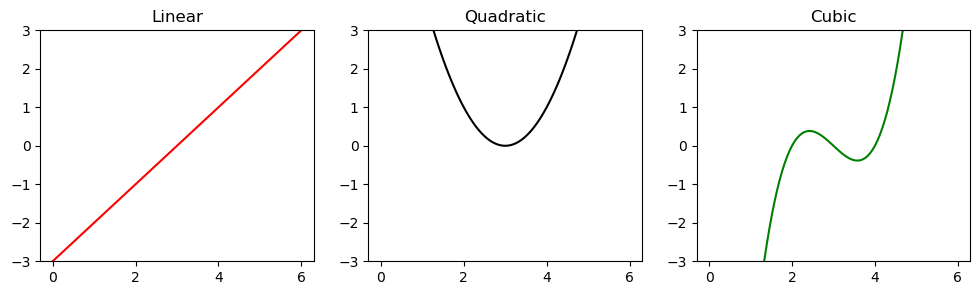

In [74]:
# An example for making subplots

p, axes = plt.subplots(1, 3, figsize=(12, 3))

x_vec = np.linspace(0, 6, 100)

axes[0].plot(x_vec, x_vec - 3, color="red")
axes[0].set_title("Linear")

axes[1].plot(x_vec, (x_vec - 3)**2, color="black")
axes[1].set_title("Quadratic")

axes[2].plot(x_vec, (x_vec - 3)**3 -(x_vec - 3), color="green")
axes[2].set_title("Cubic")

for i in range(3):
    axes[i].set_ylim([-3, 3])

plt.show(p)

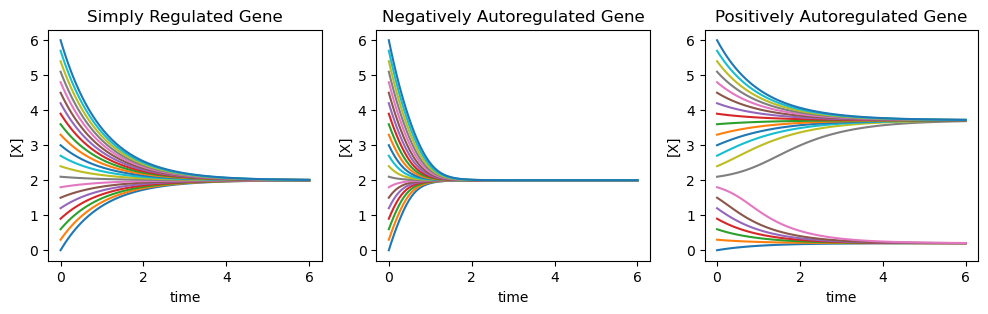

In [75]:
# Fixed parameters
alpha = 1
beta = 2    # simply regulated motif
beta_0 = .2
beta_2 = 3.6    # neg/pos autoregulated motif
K = 2
n = 6

# your solution 1.1 a)

srg_args = (alpha,beta) # control parameters for simply regulated gene
nrg_args = (alpha,beta_0,beta_2,K,n) #control parameters for pos and neg regulated gene

#timespan array
timespan = np.linspace(0,6,100)

#initial xes to scan over
x0s = np.arange(0, 6 + 0.3, .3)

p, axes = plt.subplots(1, 3, figsize = [12,3])

#loop over different starting concentrations
for x0 in x0s:
    #integrate
    srg_sol = odeint(srg_rhs, x0, timespan, args = srg_args)
    nrg_sol = odeint(nrg_rhs, x0, timespan, args = nrg_args)
    prg_sol = odeint(prg_rhs, x0, timespan, args = nrg_args)
    
    #plot solutions
    
    #simply regulated
    axes[0].plot(timespan,srg_sol)
    axes[0].set_title("Simply Regulated Gene")
  
    #negatively regulated
    axes[1].plot(timespan,nrg_sol)
    axes[1].set_title("Negatively Autoregulated Gene")
    
    #positively regulated
    axes[2].plot(timespan,prg_sol)
    axes[2].set_title("Positively Autoregulated Gene")

# title and axis labels
for i in range(3):
    axes[i].set_ylabel("[X]")
    axes[i].set_xlabel("time")

plt.show(p)

__1.1 b)__ Alter production rates – choose three different values of $\beta$ for the simply regulated gene and then
choose three different values of $\beta_0$ for the positive or negatively autoregulated gene.

Use the same time span as a). Initial value $X(0) = 0$.

Please include a legend showing the value of the parameter that you've changed to. You don't have to worry about the positioning because by default python will try to find a "best" location for the legend that doesn't get in the way of your curves.

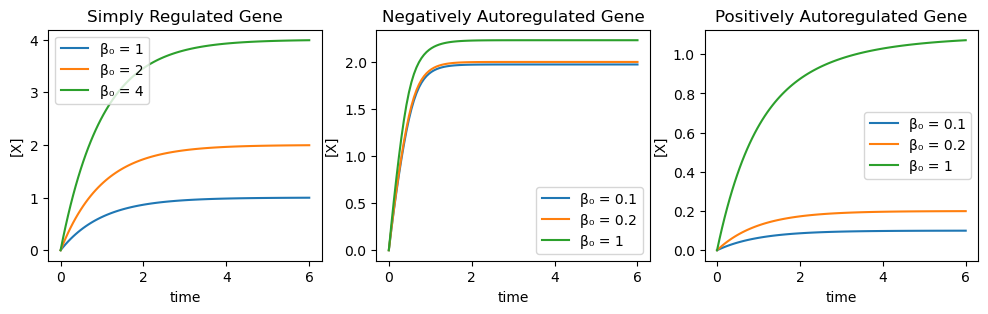

In [76]:
# Fixed parameters
alpha = 1


beta_2 = 3.6    # neg/pos autoregulated motif
K = 2
n = 6

# your solution 1.1 b)

Bs_simp = [1,2,4]
Bs_pn = [.1,.2,1]

xinit = 0

timespan = np.linspace(0,6,100)

p, axes = plt.subplots(1, 3, figsize=[12, 3])
#loop over different starting concentrations
for bs,bp in zip(Bs_simp, Bs_pn):
    
    #repack your arguments
    srg_args = (alpha,bs) # control parameters for simply regulated gene
    nrg_args = (alpha,bp,beta_2,K,n) #control parameters for pos and neg regulated gene

    #integrate
    srg_sol = odeint(srg_rhs, xinit, timespan, args = srg_args)
    nrg_sol = odeint(nrg_rhs, xinit, timespan, args = nrg_args)
    prg_sol = odeint(prg_rhs, xinit, timespan, args = nrg_args)
    
    #plot solutions
    #simply regulated
    axes[0].plot(timespan,srg_sol, label=f"β₀ = {bs}")
    axes[0].set_title("Simply Regulated Gene")
  
    #negatively regulated
    axes[1].plot(timespan, nrg_sol, label=f"β₀ = {bp}")
    axes[1].set_title("Negatively Autoregulated Gene")
    
    #positively regulated
    axes[2].plot(timespan, prg_sol, label=f"β₀ = {bp}")
    axes[2].set_title("Positively Autoregulated Gene")

for i in range(3):
    axes[i].set_xlabel("time")
    axes[i].set_ylabel("[X]")
    axes[i].legend()

plt.show(p)

__1.1 c)__ Alter degradation rates – choose 3 different values and repeat over the three motifs

Use the same time span as a). Initial value $X(0) = 0$.

Please include a legend showing the value of the parameter that you've changed to. 

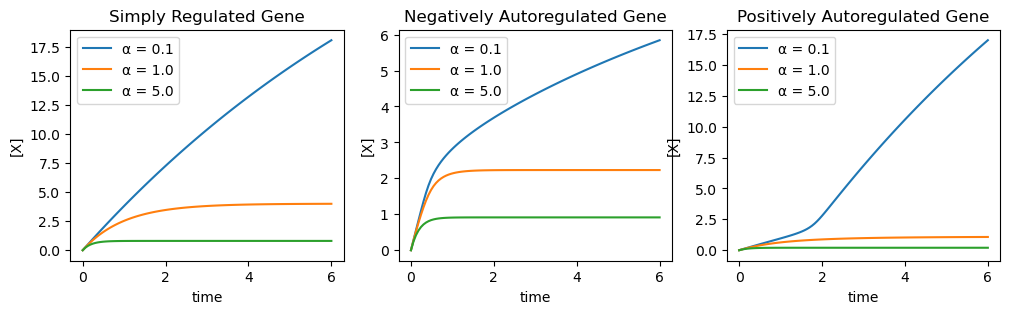

In [77]:
# Fixed parameters

beta = 2    # simply regulated motif
beta_0 = .2
beta_2 = 3.6    # neg/pos autoregulated motif
K = 2
n = 6

# your solution 1.1 c)

As = [0.1, 1., 5.]

xinit = 0

timespan = np.linspace(0,6,100)

p, axes = plt.subplots(1, 3, figsize=[12, 3])
#loop over different starting concentrations
for alpha in As:
    
    #repack your arguments
    srg_args = (alpha,bs) # control parameters for simply regulated gene
    nrg_args = (alpha,bp,beta_2,K,n) #control parameters for pos and neg regulated gene

    #integrate
    srg_sol = odeint(srg_rhs, xinit, timespan, args = srg_args)
    nrg_sol = odeint(nrg_rhs, xinit, timespan, args = nrg_args)
    prg_sol = odeint(prg_rhs, xinit, timespan, args = nrg_args)
    
    #plot solutions
    #simply regulated
    axes[0].plot(timespan,srg_sol, label=f"α = {alpha}")
    axes[0].set_title("Simply Regulated Gene")
  
    #negatively regulated
    axes[1].plot(timespan, nrg_sol, label=f"α = {alpha}")
    axes[1].set_title("Negatively Autoregulated Gene")
    
    #positively regulated
    axes[2].plot(timespan, prg_sol, label=f"α = {alpha}")
    axes[2].set_title("Positively Autoregulated Gene")

for i in range(3):
    axes[i].set_xlabel("time")
    axes[i].set_ylabel("[X]")
    axes[i].legend()

plt.show(p)

You should have a total of 9 graphs.
3 graphs for the simply regulated motif, 3 graphs for the negatively autoregulated motif, and 3 graphs for the positively autoregulated motif. Each of the 9 graphs will have 3 curves on it.

__1.2__ What happens when you choose different initial concentrations for X for each of the network motifs? Discuss and compare the differences and/or similarities between the 3 network motifs.

__Edit this cell to include your answer__

The initial conditions do not affect the steady state of the simply regulated gene, or the negatively regulated gene.
However, the positively autoregulated gene shows bistability i.e. the system reaches one of the two distinct stable steady states
depending on the initial value.

__1.3__ What happens if you change production or degradation rates for each of the network motifs? Discuss and compare the differences and/or similarities between the 3 network motifs.

__Edit this cell to include your answer__

changes the steady state value. The positively autoregulated motif may shoot to infinity if the degradation is too slow.

At the same degradation rate the negatively autoregulated gene is faster than the simply regulated one (i.e. $\tau_{1/2}$ is smaller).

## Part 2 Flux Balance Analysis

You will NOT use the ODE solver for this section – you are investigating the flux terms specified in the RHS of the ODE for the 3 network motifs- simply regulated, negatively, and positively autoregulated.
You will investigate how the production and degradation terms change as a function of [X].   

Break the RHS of your ODE into two separate terms: a production and degradation term (functions of X). 

<h3 style="color:blue;">Tasks for Part 2</h3>

__2.1__ Define Python functions for the fluxes

Define three functions that each return (1) the production rate of the negatively autoregulated motif, (2) the production rate of the positively autoregulated motif, and (3) the degradation rate (pos. and neg. motifs share the same function). All three are functions of $X$ and parameters, e.g. it may take the form of

```python
my_rate(x, param1, param2, ...)
```

In [7]:
# your solution 2.1

##DEFINE PRODUCTION TERMS
#simply regulated gene
def srg_prod(x,b):
    # or
    # return b*x**0
    return([b]*len(x))

def nrg_prod(x,b0,b,K,n):
    dxdt = b0 + b * K**n/(x**n + K**n) 
    return dxdt

def prg_prod(x,b0,b,K,n):
    dxdt = b0 + b * x**n/(x**n + K**n) 
    return dxdt

#ALL GENES HAVE SAME DEGRADATION REGULATION
#degradation term
def deg(x,a):
    return(x*a)


__2.2__ Plot the production rate, the degradation rate and the RHS as a function of $X$ for EACH of the network motifs.

Obviously, the RHS is just the production rate minus the degradation rate.

Plot all 3 lines on the same graph (RHS, Production, and Degradation on one graph for EACH network motif). 
Plot the production flux as a green solid line, the degradation flux as a red solid line, and the RHS as a black dashed line.
You should have a total of 3 graphs.
It is recommended to use the subplot technique that you've met in Part 1. 

Use the same parameters as task 1.1 a). You can use $X$ from 0 to 6 for the plots.

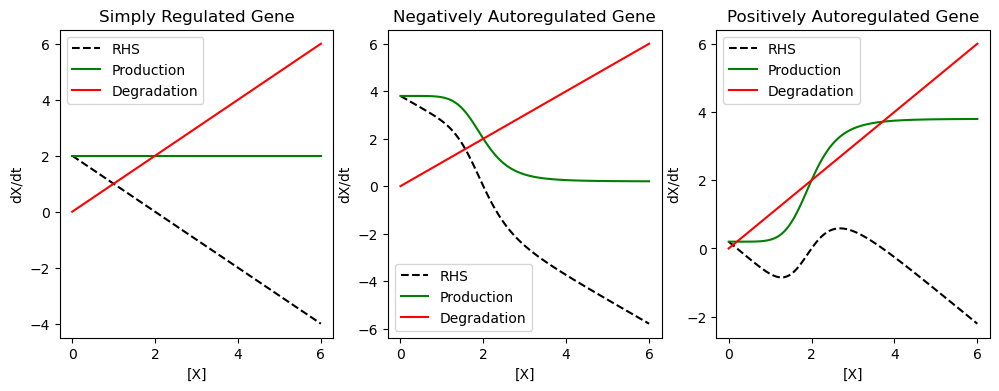

In [8]:
# Fixed parameters
alpha = 1
beta = 2    # simply regulated motif
beta_0 = .2
beta_2 = 3.6    # neg/pos autoregulated motif
K = 2
n = 6

# your solution 2.2

#generate an array of Xs
x_array = np.linspace(0, 6, 100)

#Plot
p, axes = plt.subplots(1, 3, figsize=(12, 4))

#SRG
axes[0].plot(x_array,srg_rhs(x_array,None,alpha,beta), "k--", label = "RHS")
axes[0].plot(x_array,srg_prod(x_array,beta), "g-", label = "Production")
axes[0].plot(x_array, deg(x_array,alpha), "r-", label = "Degradation")
axes[0].set_title("Simply Regulated Gene")

#NRG
axes[1].plot(x_array,nrg_rhs(x_array,None,alpha,beta_0,beta_2,K,n), "k--", label = "RHS")
axes[1].plot(x_array,nrg_prod(x_array,beta_0,beta_2,K,n), "g-", label = "Production")
axes[1].plot(x_array, deg(x_array,alpha), "r-", label = "Degradation")
axes[1].set_title("Negatively Autoregulated Gene")

#PRG
axes[2].plot(x_array,prg_rhs(x_array,None,alpha,beta_0,beta_2,K,n), "k--", label = "RHS")
axes[2].plot(x_array,prg_prod(x_array,beta_0,beta_2,K,n), "g-", label = "Production")
axes[2].plot(x_array, deg(x_array,alpha), "r-", label = "Degradation") 
axes[2].set_title("Positively Autoregulated Gene")

for i in range(3):
    axes[i].set_xlabel("[X]")
    axes[i].set_ylabel("dX/dt")
    axes[i].legend()

plt.show(p)

__2.3__ Based on the flux balance plots in 2.1, how many steady states does each motif have? Where are they on the graphs (you don't have to answer quantitatively)?

__Edit this cell to include your answer__

- Simply regulated gene: 1
- Negatively autoregulated gene: 1
- Positively autoregulated gene: 3 (it's okay for the student to say 2 because we've not stressed the difference between stable and unstable equilibria)

The steady states are at the intersections of the production and degradation curves.

What can happen to the steady states of the positively autoregulated system if the production curve shifts to the right
or shifts upwards? You can think about it but you don't have to write down the answer. 

We will walk you through how to think about this kind of question in Part 3.

## Part 3 Qualitatively Different Dynamics of a Positively Autoregulated Gene

In Part 1 and 2 you should have noticed that the positively autoregulated motif shows a very different dynamics compared
to the simply regulated or the negatively autoregulated one:
The positively autoregulated gene can arrive at two different steady states depending on the initial condition,
a behavior known as __bistability__.
It is an important idea that a gene/biochemical network can achieve more than one stable steady states.
In future lectures/labs we will see more examples of how a bistable network can be quite useful in biology,
including how bioengineers created a genetic circuit that behaves like a toggle switch,
and how mother nature uses bistability to allow a population of bacteria to "hedge their bet" under stressful environments.

However, bistability is not guaranteed for a positively autoregulated gene.
You will see through numerical simulations that a positively autoregulated gene can switch between being monostable and
bistable depending on the parameters.

<h3 style="color:blue;">Tasks for Part 3</h3>

__3.1__ Complete the code for finding the stable steady state of an ODE given the RHS and initial condition
(the part you need to complete shows as `complete the code`).

In [ ]:
# your solution 3.1

import numpy as np
from scipy.integrate import odeint

def ss(rhs, x0, args):
    # Integrate for a long enough time
    # One can do this more carefully because different rhs may have very different dynamics
    # which leads to very different response times
    # A more careful way is make the max time adaptive. Just for now though
    # We'll use a BIG number
    tmax = 100
    sol = odeint(rhs, x0, np.arange(0, tmax + 0.1, 0.1), args)

    tol = 1e-3
    # Find a point in the X vector where it converges to a certain value
    # You can find this point by asking if the change in X is sufficiently small when the system takes a step forward
    # so small that the difference is smaller than the tolerance (tol, defined above)
    # Note that when taking a step forward, X may increase or decrease (or stay essentially unchanged)
    # Please complete the code to check if the system converges
    for i in range(len(sol) - 1):    # iterate through almost all elements of X
        x_cur = sol[i, 0]    # current X
        x_next = sol[i + 1, 0]    # the next value of X
        if compete the code:    # a condition satisfied when the system converges
            return x_cur

    # Otherwise, the system never converges
    return -1    # means not converged. very unlikely in our system

In [11]:
# your solution 3.1

import numpy as np
from scipy.integrate import odeint

def ss(rhs, x0, args):
    # Integrate for a long enough time
    # One can do this more carefully because different rhs may have very different dynamics
    # which leads to very different response times
    # A more careful way is make the max time adaptive. Just for now though
    # We'll use a BIG number
    tmax = 100
    sol = odeint(rhs, x0, np.arange(0, tmax + 0.1, 0.1), args)

    tol = 1e-3
    # Find a point in the X vector where it converges to a certain value
    # You can find this point by asking if the change in X is sufficiently small when the system takes a step forward
    # so small that the difference is smaller than the tolerance (tol, defined above)
    # Note that when taking a step forward, X may increase or decrease (or stay essentially unchanged)
    # Please complete the code to check if the system converges
    for i in range(len(sol) - 1):    # iterate through almost all elements of X
        # even for a 1D ODE, the solution is a 2D np array
        x_cur = sol[i, 0]    # current X
        x_next = sol[i + 1, 0]    # the next value of X
        if abs(x_cur - x_next) < tol:    # a condition satisfied when the system converges
            return x_cur

    # Otherwise, the system never converges
    return -1    # means not converged. very unlikely in our system

__3.2__ Complete the code and find the stable steady states of a positively autoregulated motif.

In your "complete the code" section
1. Collect the parameters including $\beta_0$ into a tuple
2. Use the function you've defined in 3.1 to find the steady state given 2 different initial conditions. One initial $X$ is small, 0, and the other initial $X$ is big given by `big_x`. You'll also need to pass the RHS defined previously and the tuple of parameters into the function.
3. Append the current $\beta_0$ into the vector `beta0_vec_new`. Append the steady state you've found starting from a small $X$ into `xss_vec`.
4. Again, append the current $\beta_0$ into the vector `beta0_vec_new`. Append the steady state you've found starting from a big $X$ into `xss_vec`.

In [ ]:
# your solution 3.2

from matplotlib import pyplot as plt

# Define parameters other than beta0
# You'll iterate over a range of different values of beta0
alpha = 1.
beta = 3.
n = 6.
K = 2.

# Here is a range of different beta0
beta0_vec = np.arange(0, 1.4 + 0.02, 0.02)

# Initiate two empty vectors
# to store each beta0 and the newly found steady state of X
beta0_vec_new = []
xss_vec = []

# A big X to start with
big_x = 20.

for beta0 in beta0_vec:

    complete the code

# Plotting
# Hint: You should see two branches as the system is bistable with a subset of the different beta0's
plt.scatter(beta0_vec_new, xss_vec, marker='+')
plt.xlabel("β₀")
plt.ylabel("Steady state of X");

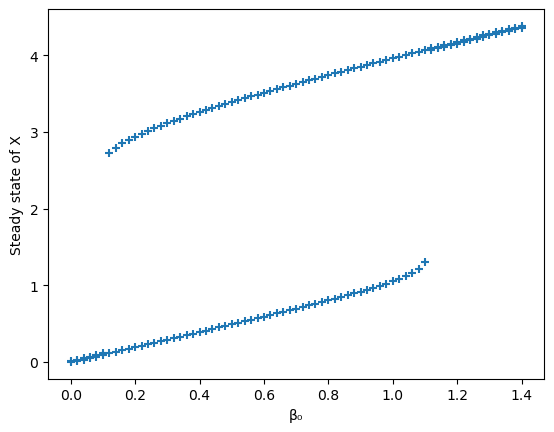

In [12]:
# your solution 3.2

from matplotlib import pyplot as plt

# Define parameters other than beta0
# You'll iterate over a range of different values of beta0
alpha = 1.
beta = 3.
n = 6.
K = 2.

# Here is a range of different beta0
beta0_vec = np.arange(0, 1.4 + 0.02, 0.02)

# Initiate two empty vectors
# to store each beta0 and the newly found steady state of X
beta0_vec_new = []
xss_vec = []

# A big X to start with
big_x = 20.

for beta0 in beta0_vec:

    args = (alpha, beta0, beta, K, n)
    
    xss1 = ss(prg_rhs, 0., args)
    xss2 = ss(prg_rhs, big_x, args)

    beta0_vec_new.append(beta0)
    xss_vec.append(xss1)
    beta0_vec_new.append(beta0)
    xss_vec.append(xss2)

# Plotting
# Hint: You should see two branches as the system is bistable with a subset of the different beta0's
plt.scatter(beta0_vec_new, xss_vec, marker='+')
plt.xlabel("β₀")
plt.ylabel("Steady state of X");

__3.3__ Eyeball the curves from 3.2 and answer roughly in what range of $\beta_0$ the system is bistable.
You don't have to write any code to answer this question.
Why we call it a _bistable region_?

__Edit this cell to add your answer__

Roughly from $\beta_0 = 0.1$ to $\beta_0 = 1.1$.

It is know to be bistable because the system can reach two distinct stable steady states.

__3.4__ Sanity check for bistability.

Please plot a figure with 3 horizontally arranged panels (subplots). In each panel plot a series of trace of $X$ i.e. the numerical solution of $X$ against $t$.
The series of $X(t)$ should start from different initial $X$ that goes from 0 to 5.

Pick a different $\beta_0$ for each panel guided by your answer in 3.3. Please pick 2 values of $\beta_0$ where the model admits 1 stable state and 1 value of $\beta_0$ where it admits 2 stable steady states.
The way that each panel converges should agree with your figure in 3.2

Hint: You may want to run the traces for a long enough time as the dynamics can be relatively slow!

Remember to label your axes and label your title to reflect your choice of $\beta_0$

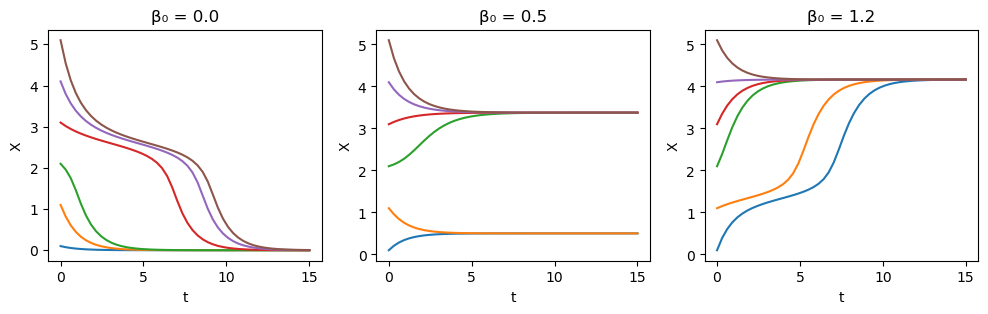

In [13]:
# Define parameters other than beta0
alpha = 1.
beta = 3.
n = 6.
K = 2.

# your solution 3.4

beta0_vec = [0.0, 0.5, 1.2]

x0_vec = np.arange(0.1, 6.1, 1.)

t_vec = np.linspace(0, 15, 50)

p, axes = plt.subplots(1, 3, figsize=(12, 3))

for i in range(len(beta0_vec)):
    ax = axes[i]
    beta0 = beta0_vec[i]
    args = (alpha, beta0, beta, K, n)

    for x0 in x0_vec:
        sol = odeint(prg_rhs, x0, t_vec, args)
        ax.plot(t_vec, sol)
        ax.set_title(f"β₀ = {beta0}")
        ax.set_xlabel("t")
        ax.set_ylabel("X")

plt.show(p)

Why does the dynamics of a positively autoregulated motif change qualitatively (a jump!) when the _control parameter_
$\beta_0$ changes continuously?
Let's answer the question with the help of a flux balance plot (by a plot I mean many)!

__3.5__ Flux balance plot of the positively autoregulated motif.

You should have defined the production rate and degradation rate of the positively autoregulated motif separately
as a function of $X$ in task 2.1.

With the help of the two functions,
make a flux balance plot showing the production and the degradation rate as $X$ goes from 0 to 5.
Keep the same parameter from the previous task except for $\beta_0$.

You will plot a series of production rates with $\beta_0$ changing from 0 to 1.4 in steps of 0.2
as solid lines and the degradation rates as a dashed line.
Note that the degradation rate is not affected by your choice of $\beta_0$.

Label your curves. E.g., label your production rates as "Prod β₀ = val" and your degradation rates as "Deg".
Remember to label your axes.

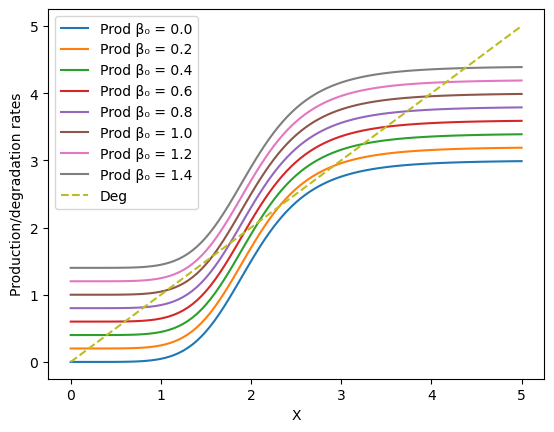

In [14]:
# Define parameters other than beta0
# You'll iterate over a range of different values of beta0
alpha = 1.
beta = 3.
n = 6.
K = 2.

# your solution 3.5

beta0_vec = np.arange(0, 1.4 + 0.2, 0.2)
x_vec = np.arange(0, 5 + 0.05, 0.05)

prod_vec = []
deg_vec = []

plt.figure()

for beta0 in beta0_vec:
    plt.plot(x_vec, prg_prod(x_vec, beta0, beta, K, n), label = f"Prod β₀ = {beta0:.1f}")

plt.plot(x_vec, deg(x_vec, alpha), label = "Deg", linestyle="dashed")
plt.legend()
plt.xlabel("X")
plt.ylabel("Production/degradation rates");

__3.6__ Look for the _intersection(s)_ between a production rate curve and a degradation rate curve.

How many intersections do you find at each value of $\beta_0$ as it goes from 0 to 1.4?

Compare your finding to the bistability region you've discovered in 3.3. What do you find?

__Edit this cell to add your answer__

Value of $\beta_0$; Number of intersections

0.0; 1

0.2; 3

0.4; 3

0.6; 3

0.8; 3

1.0; 3

1.2; 1

1.4; 1

The range of $\beta_0$ that admits 3 intersections on the flux balance plot corresponds to the bistability region from 3.3

### Bifurcation

As a control parameter (e.g. $\beta_0$) changes continuously, something extrodinary happens to the dynamics of $X$:
The number of stable steady states jumps suddenly from one to two or vice versa.
You should have observed what happens near a "jump" from different angles:
The trace of $X$ as a function of time changes, the steady state changes, and the intersection of the flux balance plot changes.

The qualitative change in the system resulting from a continuous change in its parameter(s) is know as a __bifurcation__.
It is a crucial concept to understand biological dynamics which we will come back to many times throughout the class.